In [1]:
import torch
import torchani
from torchani.datasets import ANIDataset
from torchani.units import hartree2kcalmol
from pathlib import Path
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/nick/TorchANI_sandbox/torchani/infer.py:16: UserWarning: mnp not installed
  warnings.warn("mnp not installed")
/home/nick/TorchANI_sandbox/torchani/aev/aev_computer.py:24: UserWarning: cuaev not installed
  warnings.warn("cuaev not installed")


In [2]:
device = torch.device('cpu')

In [3]:
ani2x = torchani.models.ANI2x(periodic_table_index=True)

/home/nick/TorchANI_sandbox/torchani/models.py:103: UserWarning: The default is now to accept atomic numbers as indexes, do not set periodic_table_index=True. if you need to accept raw indices set periodic_table_index=False
  warnings.warn("The default is now to accept atomic numbers as indexes,"


In [4]:
path = Path('/home/nick/CSVs/df_comp6v2.csv')
df = pd.read_csv(path)
print(df)

         Unnamed: 0         Formula  Species    Avg_AE     Stdev  \
0                 0  C101H154N28O29        6 -0.004423  0.009111   
1                 1  C101H154N28O29        6 -0.027310  0.004850   
2                 2  C101H154N28O29        8 -0.011999  0.003635   
3                 3  C101H154N28O29        1 -0.004328  0.002893   
4                 4  C101H154N28O29        1 -0.002906  0.003142   
...             ...             ...      ...       ...       ...   
3897973     3897973  C101H154N28O29        1  0.000628  0.003690   
3897974     3897974  C101H154N28O29        1 -0.000595  0.003677   
3897975     3897975  C101H154N28O29        8 -0.003454  0.007370   
3897976     3897976  C101H154N28O29        1  0.000662  0.003689   
3897977     3897977  C101H154N28O29        1  0.000662  0.003689   

                     QBC  
0           [0.00078292]  
1           [0.00078292]  
2           [0.00078292]  
3           [0.00078292]  
4           [0.00078292]  
...                  

In [5]:
df_by_species = df.set_index('Species')

h_df = df_by_species.loc[1]
c_df = df_by_species.loc[6]
n_df = df_by_species.loc[7]
o_df = df_by_species.loc[8]
s_df = df_by_species.loc[16]
f_df = df_by_species.loc[9]
cl_df= df_by_species.loc[17]

In [6]:
# H and F highest uncertainty atomic energies both from C101H154N28O29
print(h_df.iloc[h_df['Stdev'].argmax()])
print(c_df.iloc[c_df['Stdev'].argmax()])
print(n_df.iloc[n_df['Stdev'].argmax()])
print(o_df.iloc[o_df['Stdev'].argmax()])
print(s_df.iloc[s_df['Stdev'].argmax()])
print(f_df.iloc[f_df['Stdev'].argmax()])
print(cl_df.iloc[cl_df['Stdev'].argmax()])

Unnamed: 0           2769483
Formula       C101H154N28O29
Avg_AE              0.094282
Stdev               0.024974
QBC             [0.00756141]
Name: 1, dtype: object
Unnamed: 0            392045
Formula       C101H154N28O29
Avg_AE              0.036722
Stdev               0.031953
QBC             [0.00693975]
Name: 6, dtype: object
Unnamed: 0           1536244
Formula       C101H154N28O29
Avg_AE              0.038801
Stdev               0.028331
QBC             [0.00924642]
Name: 7, dtype: object
Unnamed: 0            455098
Formula       C101H154N28O29
Avg_AE              0.058638
Stdev               0.027685
QBC             [0.00408769]
Name: 8, dtype: object
Unnamed: 0            792065
Formula       C101H154N28O29
Avg_AE             -0.033255
Stdev               0.025368
QBC             [0.00056593]
Name: 16, dtype: object
Unnamed: 0           2769468
Formula       C101H154N28O29
Avg_AE              0.268857
Stdev               0.019608
QBC             [0.00756141]
Name: 9, dtype

In [7]:
h_energies = h_df['Avg_AE'].to_numpy()
h_stdev = h_df['Stdev'].to_numpy()

c_energies = c_df['Avg_AE'].to_numpy()
c_stdev = c_df['Stdev'].to_numpy()

n_energies = n_df['Avg_AE'].to_numpy()
n_stdev = n_df['Stdev'].to_numpy()

o_energies = o_df['Avg_AE'].to_numpy()
o_stdev = o_df['Stdev'].to_numpy()

s_energies = s_df['Avg_AE'].to_numpy()
s_stdev = s_df['Stdev'].to_numpy()

f_energies = f_df['Avg_AE'].to_numpy()
f_stdev = f_df['Stdev'].to_numpy()

cl_energies = cl_df['Avg_AE'].to_numpy()
cl_stdev = cl_df['Stdev'].to_numpy()

In [8]:
print('Atomic energy divided by stdev for HCNOSFCl:')
for i, j in [(h_energies, h_stdev), (c_energies, c_stdev), (n_energies, n_stdev), (o_energies, o_stdev), (s_energies, s_stdev), (f_energies, f_stdev), (cl_energies, cl_stdev)]:
    print(abs(i.mean())/j.mean())

Atomic energy divided by stdev for HCNOSFCl:
0.06458555423095023
0.13416614447038203
0.8610345044221613
0.24695158869437178
3.349844487898966
3.5571700352429065
5.903852326847554


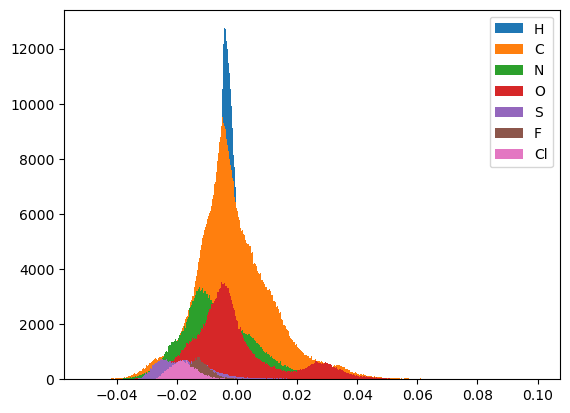

In [9]:
# Overlayed histogram of atomic energy contributions by atom types: 

plt.hist(h_energies, bins=3000, range=[-0.05,0.1], label='H')
plt.hist(c_energies, bins=1000, range=[-0.05,0.1], label='C')
plt.hist(n_energies, bins=500, range=[-0.05,0.1], label='N')
plt.hist(o_energies, bins=500, range=[-0.05,0.1], label='O')
plt.hist(s_energies, bins=500, range=[-0.05,0.1], label='S')
plt.hist(f_energies, bins=(math.isqrt(len(o_df))), range=[-0.05,0.1], label='F')
plt.hist(cl_energies, bins=(math.isqrt(len(o_df))), range=[-0.05,0.1], label='Cl')
plt.legend(loc='upper right')
plt.show()

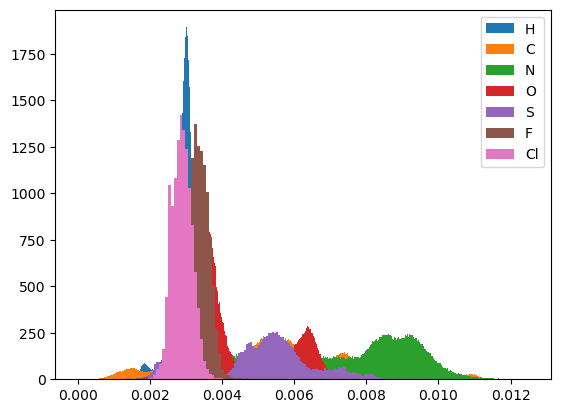

In [10]:
# Overlayed histogram of standard deviations for atomic energy contributions by atom type: 

plt.hist(h_stdev, bins=(math.isqrt(len(h_df))), label='H', range=[0,0.0125], density=True)
plt.hist(c_stdev, bins=(math.isqrt(len(c_df))), label='C', range=[0,0.0125], density=True)
plt.hist(n_stdev, bins=(math.isqrt(len(n_df))), label='N', range=[0,0.0125], density=True)
plt.hist(o_stdev, bins=(math.isqrt(len(o_df))), label='O', range=[0,0.0125], density=True)
plt.hist(s_stdev, bins=(math.isqrt(len(s_df))), label='S', range=[0,0.0125], density=True)
plt.hist(f_stdev, bins=(math.isqrt(len(f_df))), label='F', range=[0,0.0125], density=True)
plt.hist(cl_stdev, bins=(math.isqrt(len(cl_df))), label='Cl', range=[0,0.0125], density=True)
plt.legend(loc='upper right')
plt.show()

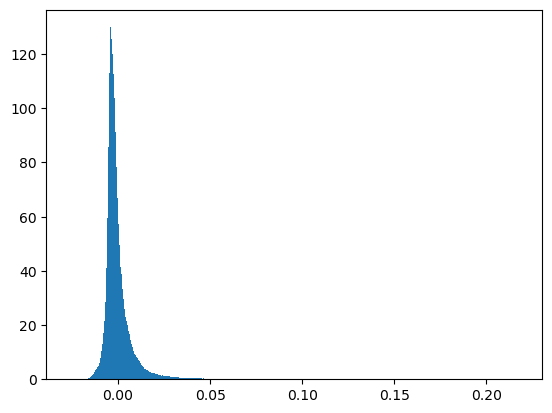

avg h energy: -0.12167240087751367 kcal/mol


In [11]:
plt.hist(h_energies, bins=(math.isqrt(len(h_df))), label='H stdev', density=True)
plt.show()
print('avg h energy:',hartree2kcalmol(np.mean(h_energies)),'kcal/mol')

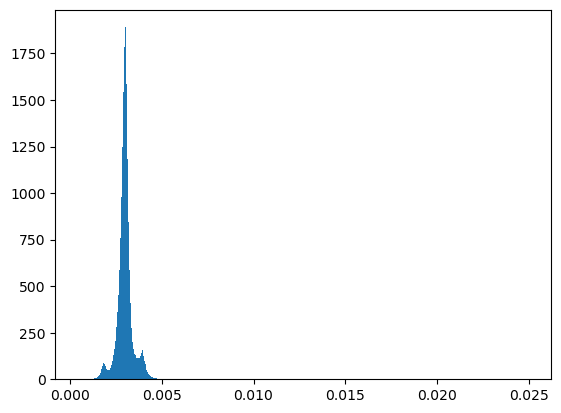

avg h stdev: 1.883894971968928 kcal/mol


In [12]:
plt.hist(h_stdev, bins=(math.isqrt(len(h_df))), label='H stdev', density=True)
plt.show()
print('avg h stdev:',hartree2kcalmol(np.mean(h_stdev)),'kcal/mol')

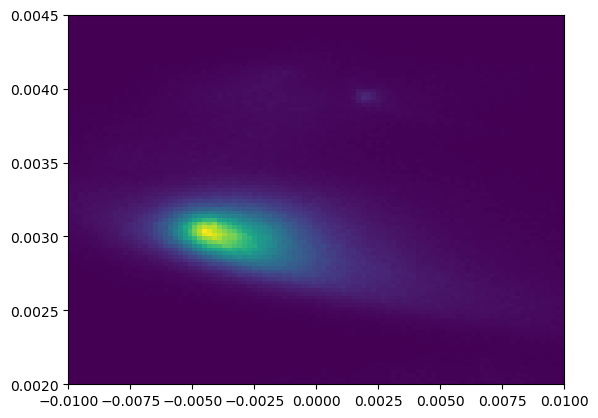

In [13]:
# Hydrogen E vs Stdev 

x = h_energies
y = h_stdev
plt.hist2d(x,y,bins=(100,100),range=[[-0.01,0.01],[0.0020,0.0045]])
plt.show()

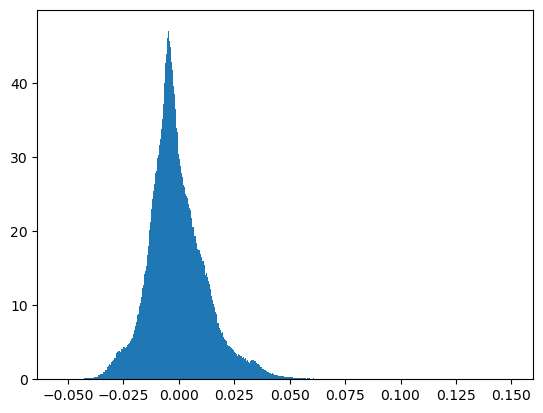

avg c energy: -0.43699927573853564 kcal/mol


In [14]:
plt.hist(c_energies, bins=(math.isqrt(len(c_df))), label='C energies', density=True)
plt.show()
print('avg c energy:',hartree2kcalmol(np.mean(c_energies)),'kcal/mol')

1333643


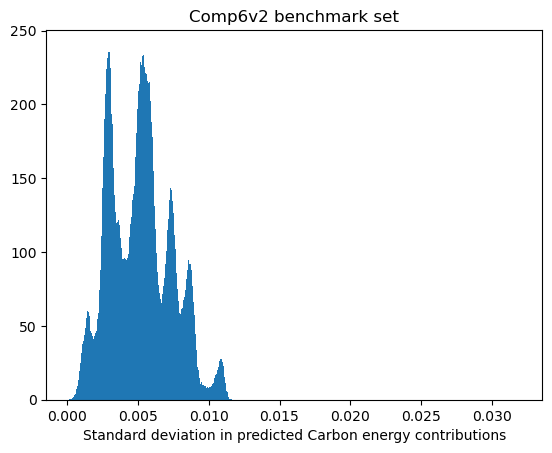

Average standard deviation in carbon energy contribution: 3.257 kcal/mol


In [21]:
print(len(c_stdev))
plt.hist(c_stdev, bins=(math.isqrt(len(c_df))), label='C stdev', density=True,)
plt.title('Comp6v2 benchmark set')
plt.xlabel('Standard deviation in predicted Carbon energy contributions')
plt.show()
print('Average standard deviation in carbon energy contribution:',round(hartree2kcalmol(np.mean(c_stdev)),3),'kcal/mol')

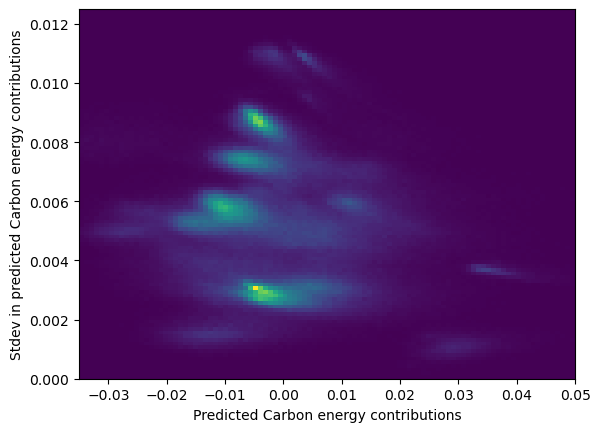

In [16]:
# Carbon E vs Stdev

x = c_energies
y = c_stdev
plt.hist2d(x,y,bins=(100,100),range=[[-0.035,0.05],[0,0.0125]])
plt.xlabel('Predicted Carbon energy contributions')
plt.ylabel('Stdev in predicted Carbon energy contributions')
plt.show()

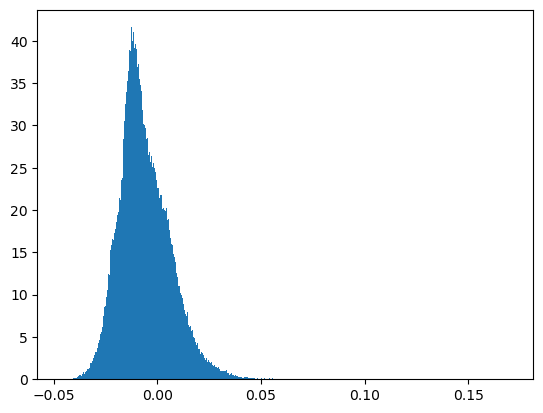

avg n energy: -3.843062945321153 kcal/mol


In [17]:
plt.hist(n_energies, bins=(math.isqrt(len(n_df))), label='N energies', density=True)
plt.show()
print('avg n energy:',hartree2kcalmol(np.mean(n_energies)),'kcal/mol')

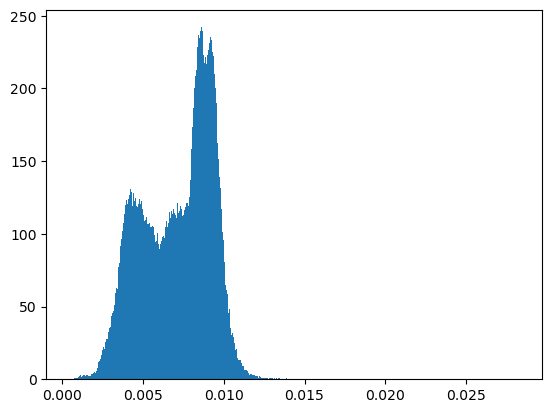

avg n stdev: 4.4633088750609655 kcal/mol


In [18]:
plt.hist(n_stdev, bins=(math.isqrt(len(n_df))), label='N stdev', density=True)
plt.show()
print('avg n stdev:',hartree2kcalmol(np.mean(n_stdev)),'kcal/mol')

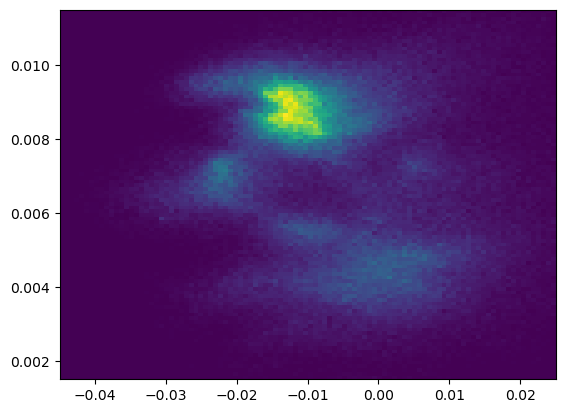

In [19]:
# Nitrogen E vs Stdev

x = n_energies
y = n_stdev
plt.hist2d(x,y,bins=(100,100),range=[[-0.045,0.025],[0.0015,0.0115]])
plt.show()

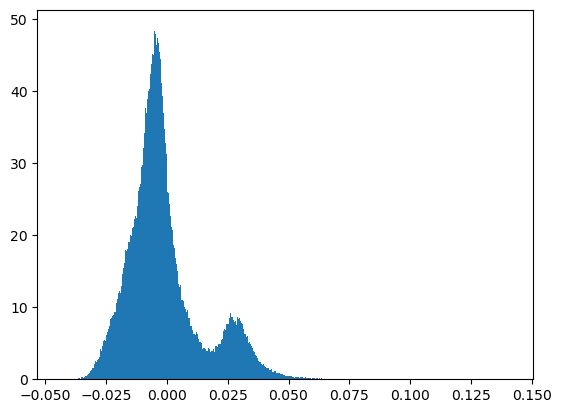

avg o energy: -0.6709122252398062 kcal/mol


In [20]:
plt.hist(o_energies, bins=(math.isqrt(len(o_df))), label='O stdev', density=True)
plt.show()
print('avg o energy:',hartree2kcalmol(np.mean(o_energies)),'kcal/mol')

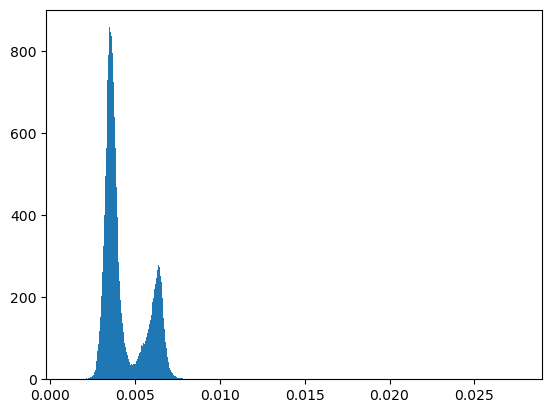

avg o stdev: 2.7167763074005964 kcal/mol


In [21]:
plt.hist(o_stdev, bins=(math.isqrt(len(o_df))), label='O stdev', density=True)
plt.show()
print('avg o stdev:',hartree2kcalmol(np.mean(o_stdev)),'kcal/mol')

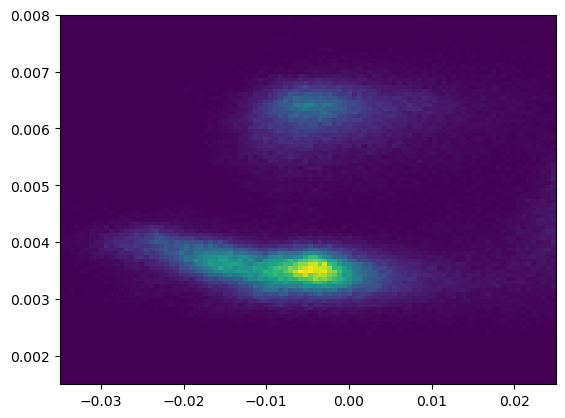

In [22]:
# Oxygen E vs Stdev

x = o_energies
y = o_stdev
plt.hist2d(x,y,bins=(100,100),range=[[-0.035,0.025],[0.0015,0.008]])
plt.show()

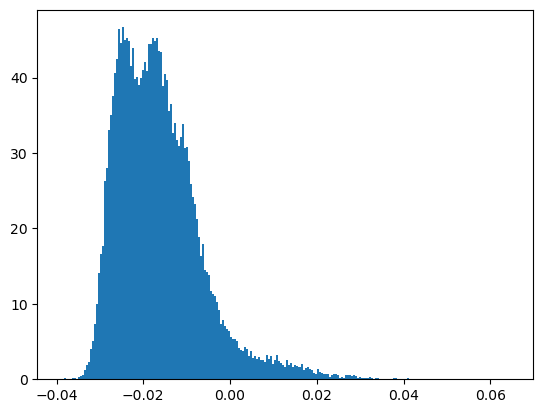

avg s energy: -10.18695478761178 kcal/mol


In [23]:
plt.hist(s_energies, bins=(math.isqrt(len(s_df))), label='S energies', density=True)
plt.show()
print('avg s energy:',hartree2kcalmol(np.mean(s_energies)),'kcal/mol')

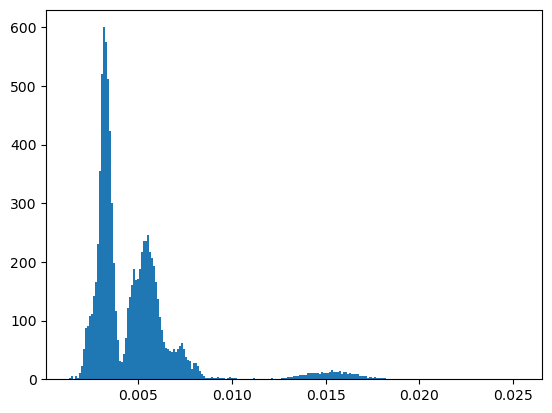

avg s stdev: 3.041023195080042 kcal/mol


In [24]:
plt.hist(s_stdev, bins=(math.isqrt(len(s_df))), label='S stdev', density=True)
plt.show()
print('avg s stdev:',hartree2kcalmol(np.mean(s_stdev)),'kcal/mol')

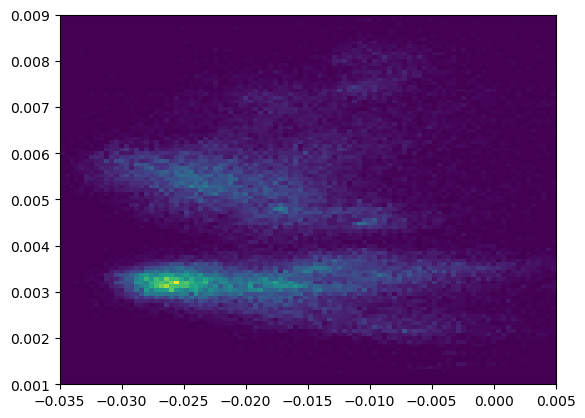

In [25]:
# Sulfur E vs Stdev

x = s_energies
y = s_stdev
plt.hist2d(x,y,bins=(100,100),range=[[-0.035,0.005],[0.001,0.009]])
plt.show()

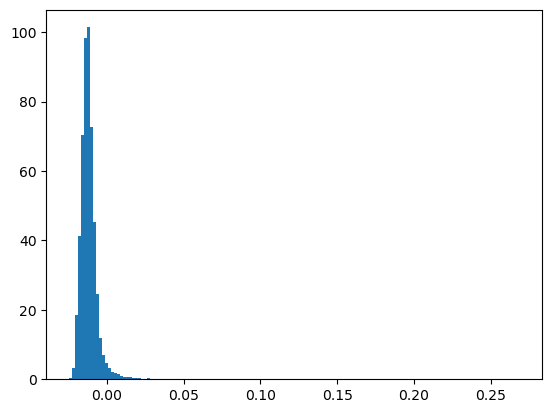

avg f energy: -7.4437259026957765 kcal/mol


In [26]:
plt.hist(f_energies, bins=(math.isqrt(len(f_df))), label='F energies', density=True)
plt.show()
print('avg f energy:',hartree2kcalmol(np.mean(f_energies)),'kcal/mol')

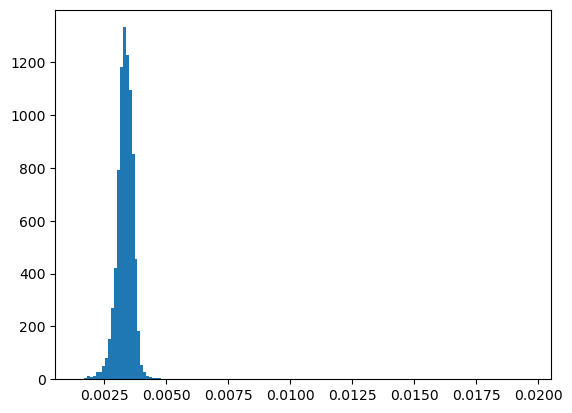

avg f stdev: 2.0925977192393255 kcal/mol


In [27]:
plt.hist(f_stdev, bins=(math.isqrt(len(f_df))), label='F stdev', density=True)
plt.show()
print('avg f stdev:',hartree2kcalmol(np.mean(f_stdev)),'kcal/mol')

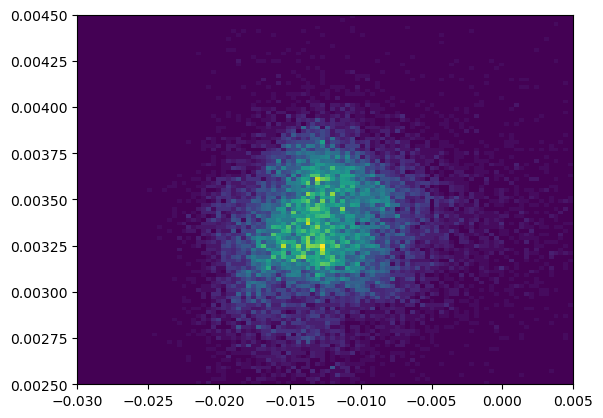

In [28]:
# Fluorine E vs Stdev

x = f_energies
y = f_stdev
plt.hist2d(x,y,bins=(100,100),range=[[-0.03,0.005],[0.0025,0.0045]])
plt.show()

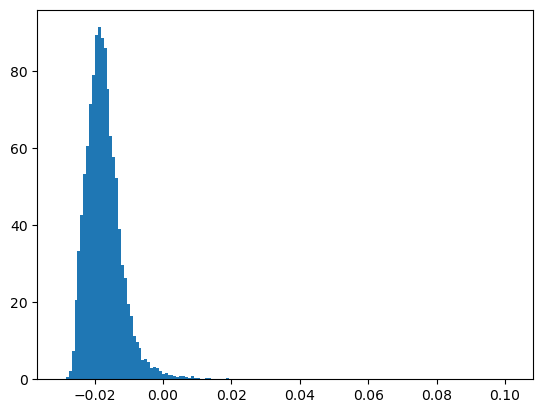

avg cl energy: -10.738172338617284 kcal/mol


In [29]:
plt.hist(cl_energies, bins=(math.isqrt(len(cl_df))), label='Cl energies', density=True)
plt.show()
print('avg cl energy:',hartree2kcalmol(np.mean(cl_energies)),'kcal/mol')

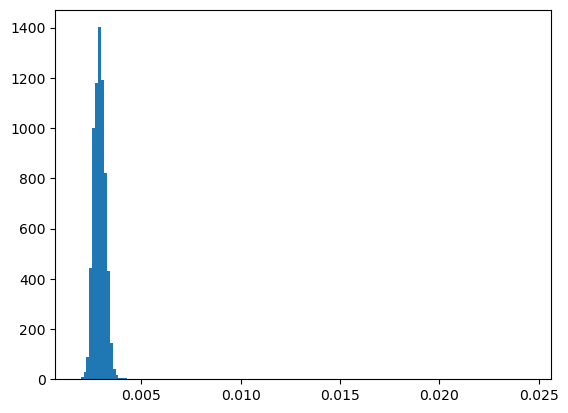

avg cl stdev: 1.8188416213911442 kcal/mol


In [30]:
plt.hist(cl_stdev, bins=(math.isqrt(len(cl_df))), label='Cl energies', density=True)
plt.show()
print('avg cl stdev:',hartree2kcalmol(np.mean(cl_stdev)),'kcal/mol')

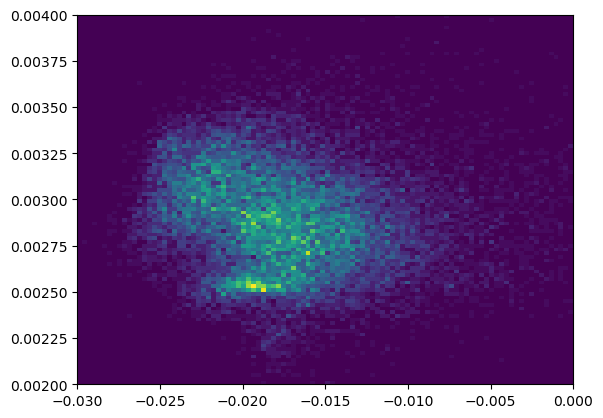

In [31]:
# Chlorine E vs Stdev

x = cl_energies
y = cl_stdev
plt.hist2d(x,y,bins=(100,100),range=[[-0.03,0.],[0.002,0.004]])
plt.show()